In [5]:
import hiplot as hip
import pandas as pd
import matplotlib.pyplot as plt
import uproot3 as uproot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import random
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import os
import sys
from scipy.optimize import curve_fit
from scipy.integrate import quad
import numpy as np

import mplhep as hep
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use([hep.styles.ATLAS])
# mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'STIXGeneral'

from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=17)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [6]:
ofolder="/d/grid17/ln16/dselector_v3/study_f2toPiPi/results/"
os.system("mkdir -p "+ofolder)

0

In [7]:
def loadDF(fileName,treeName,cols):
    ''' Function to load a root file '''
    tree=uproot.open(fileName)[treeName]
    df=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
    return df

In [8]:
baseDir="/d/grid17/ln16/dselector_v3/study_f2toPiPi/"

In [9]:
cols=["mandelstam_t","Mpi0p","Mpi0eta","cosTheta_eta_hel","phi_eta_hel","Ebeam"]
pipi_gen=loadDF(baseDir+"degALL_flat_2017_gen_flat_DSelector.root","kin",cols)
pipi_gen=pipi_gen[(pipi_gen.mandelstam_t>0.1)&(pipi_gen.mandelstam_t<1.0)]

In [10]:
cols=["cosTheta_eta_hel","phi_eta_hel","Mpi0","Mpi0p","Metap","Mpi0pi0","Ebeam","mandelstam_t",
      "weightBS","weightBSpi0","weightBSeta","AccWeight","weightASBS","vanHove_omega","vanHove_x","vanHove_y"]
pipi_recon=loadDF(baseDir+"degALL_flat_2017_mEllipse_8288_tLT1_treeFlat_DSelector.root","tree_4g_flat",cols+["mandelstam_t_thrown","Ebeam_thrown"])
pipi_data=loadDF(baseDir+"degALL_data_2017_mEllipse_8288_tLT1_treeFlat_DSelector.root","tree_4g_flat",cols)

In [11]:
print(f"Weighted entries in gen: {len(pipi_gen)}")
print(f"Weighted entries in acc: {sum(pipi_recon.weightASBS)}")
print(f"Weighted entries in dat: {len(pipi_data.weightASBS)}")

Weighted entries in gen: 5188201
Weighted entries in acc: 554322.4375
Weighted entries in dat: 200539


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


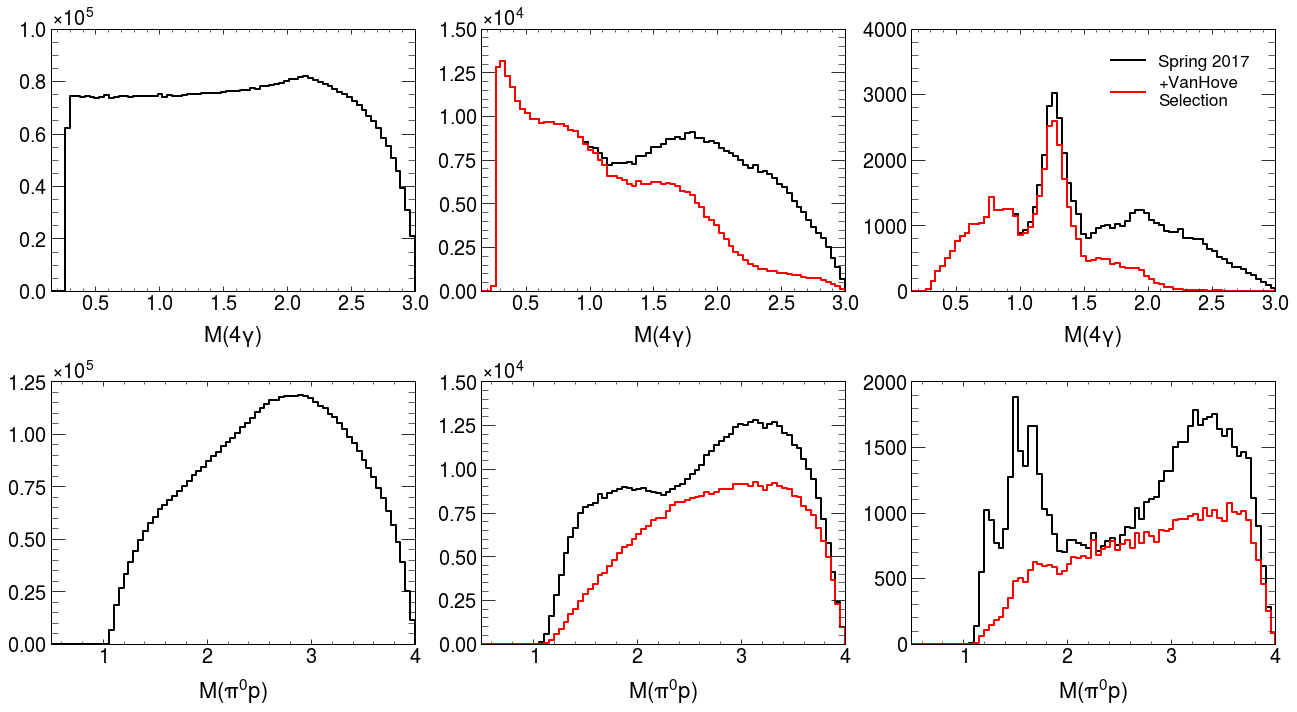

In [12]:
fig,axes=plt.subplots(2,3,figsize=(18,10))

edges4g=np.linspace(0.15,3.0,76)
edges2gp=np.linspace(0.5,4.0,76)
## 4g plots
hep.histplot(np.histogram(pipi_gen.Mpi0eta,bins=edges4g),ax=axes[0,0],c='black')
hep.histplot(np.histogram(pipi_recon.Mpi0pi0,weights=pipi_recon.weightASBS,bins=edges4g),ax=axes[0,1],c='black')
hep.histplot(np.histogram(pipi_data.Mpi0pi0,weights=pipi_data.weightASBS,bins=edges4g),ax=axes[0,2],c='black',label="Spring 2017")
## pi0proton plots
hep.histplot(np.histogram(pipi_gen.Mpi0p,bins=edges2gp),ax=axes[1,0],c='black')
hep.histplot(np.histogram(pipi_recon.Mpi0p,weights=pipi_recon.weightASBS,bins=edges2gp),ax=axes[1,1],c='black')
hep.histplot(np.histogram(pipi_data.Mpi0p,weights=pipi_data.weightASBS,bins=edges2gp),ax=axes[1,2],c='black')

#### INCLUDE VAN HOVE SELECTION
## 4g plots
pipi_recon=pipi_recon[(pipi_recon.vanHove_omega>238)&(pipi_recon.vanHove_omega<302)]
pipi_data=pipi_data[(pipi_data.vanHove_omega>238)&(pipi_data.vanHove_omega<302)]
hep.histplot(np.histogram(pipi_recon.Mpi0pi0,weights=pipi_recon.weightASBS,bins=edges4g),ax=axes[0,1],c='red')
hep.histplot(np.histogram(pipi_data.Mpi0pi0,weights=pipi_data.weightASBS,bins=edges4g),ax=axes[0,2],c='red',label="+VanHove\nSelection")
## pi0proton plots
hep.histplot(np.histogram(pipi_recon.Mpi0p,weights=pipi_recon.weightASBS,bins=edges2gp),ax=axes[1,1],c='red')
hep.histplot(np.histogram(pipi_data.Mpi0p,weights=pipi_data.weightASBS,bins=edges2gp),ax=axes[1,2],c='red')

[axes[j,i].set_ylim(0) for i in range(3) for j in range(2)]
[axes[0,i].set_xlim(edges4g[0],edges4g[-1]) for i in range(3)]
[axes[1,i].set_xlim(edges2gp[0],edges2gp[-1]) for i in range(3)]
[axes[0,i].set_xlabel("$M(4\gamma)$") for i in range(3)]
[axes[1,i].set_xlabel("$M(\pi^{0}p)$") for i in range(3)]

axes[0,2].legend()

plt.tight_layout()
plt.savefig(f'{ofolder}/M4g_and_Mpip_vanHoveSelect.pdf')

Bin Width: 0.03999999999999998
Method 1 errors (incorrect / not using): [104.38682539  92.3189753   92.60836391 100.60724119 114.03823748
 131.89121546 152.85072972 177.74009071 179.00175401 163.41719966
 143.42160458 122.0608245  108.72919836  90.89032803  76.50250574
  79.63876585  79.22360865]
Method 2 errors: [ 101.70729294  152.06733279  166.09957684  199.5616512   223.40032733
  252.45248446  271.49882662  283.00772628  292.54847143  301.44240292
  329.35902095  369.66503302  393.85181248  355.83957855  355.76176433
  374.11911161  376.24700329  331.68351885  337.41271746  387.27218182
  451.11673748  561.09747041  666.21591819  799.74513762  821.73872649
  746.16242232  639.85033679  526.63916731  456.85688509  381.96079113
  317.73157996  331.27271533  330.03097776  336.06730761  327.79786856
  335.6343433   351.04925068  323.38260194  342.44233803  360.27365016
  407.37140456  409.20324711  374.13938265  387.33890325  370.33883527
  376.26594376  361.44754682  327.41465805  35

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


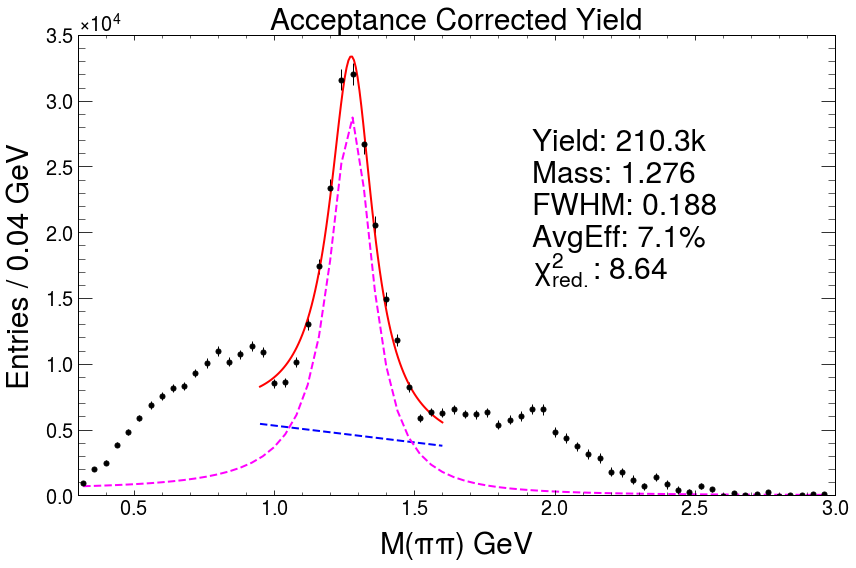

In [13]:
from scipy.special import voigt_profile as voigt

# def signal(x,A,gamma):
# #     return A*voigt(x,0.027,gamma)
#     return A*voigt(x,0.00001,gamma)
def signal(x,A,mass,gamma):
    ''' Equation for relativistic breit-wigner'''
    width=2*gamma
    gamma=np.sqrt(mass*mass*(mass*mass+width*width))
    k=2*np.sqrt(2)*mass*width*gamma/np.pi/np.sqrt(mass*mass+gamma)
    return A * k / ((x*x - mass*mass)**2 + (mass*width)**2)
def bkgnd(x,a,b):
    return a+b*x
def func(x,A,mass,gamma,a,b):
    return signal(x,A,mass,gamma)+bkgnd(x,a,b)

fig,ax=plt.subplots(1,1,figsize=(12,8))

tmin=0.1
tmax=1.0
xmin=0.3
xmax=3.0
#########################
# LOAD AND BIN THE DAT, ACC, GEN DATASETS
#########################
tmp_dat_df=pipi_data[(pipi_data.mandelstam_t>tmin)&(pipi_data.mandelstam_t<tmax)]
tmp_acc_df=pipi_recon[(pipi_recon.mandelstam_t>tmin)&(pipi_recon.mandelstam_t<tmax)]#&(pipi_recon.mandelstam_t_thrown>tmin)&(pipi_recon.mandelstam_t_thrown<tmax)]
tmp_gen_df=pipi_gen[(pipi_gen.mandelstam_t>tmin)&(pipi_gen.mandelstam_t<tmax)]

#########################
# BIN AND ACCEPTANCE CORRECT THE DATA
#########################
edges2=np.arange(xmin,xmax,step=0.04) # nbins+1
width=edges2[1]-edges2[0]
print(f"Bin Width: {width}")
centers2=edges2[:-1]+(edges2[1]-edges2[0])/2
counts_dat,_=np.histogram(tmp_dat_df.Mpi0pi0,weights=tmp_dat_df.weightASBS,bins=edges2)
counts_acc,_=np.histogram(tmp_acc_df.Mpi0pi0,weights=tmp_acc_df.weightASBS,bins=edges2)
counts_gen,_=np.histogram(tmp_gen_df.Mpi0eta,bins=edges2)
counts2=counts_dat*counts_gen/counts_acc # acceptance corrected
avgEff=(counts_acc/counts_gen).mean()

f2_peak=0
fitMin, fitMax=0.95,1.6

c2=counts2[(centers2>fitMin)&(centers2<fitMax)]

### Calculate the error
# METHOD 1:
c2err=np.sqrt(counts2[(centers2>fitMin)&(centers2<fitMax)])
print(f"Method 1 errors (incorrect / not using): {c2err}")
# METHOD 2:
w2_dat_err,_=np.histogram(tmp_dat_df.Mpi0pi0,weights=tmp_dat_df.weightASBS**2,bins=edges2) # Sum(W2) = error squared
w2_acc_err,_=np.histogram(tmp_acc_df.Mpi0pi0,weights=tmp_acc_df.weightASBS**2,bins=edges2)
corrected_percent_error=np.sqrt(
    (np.sqrt(w2_dat_err)/counts_dat)**2+
    (np.sqrt(w2_acc_err)/counts_acc)**2+
    (np.sqrt(counts_gen)/counts_gen)**2 # poisson error for generated
)
c2err=counts2*corrected_percent_error
print(f"Method 2 errors: {c2err}")

x2=centers2[(centers2>fitMin)&(centers2<fitMax)]-f2_peak

hep.histplot((counts2,edges2),histtype='errorbar',yerr=c2err,c='black',ax=ax)
ax.set_ylim(0)

c2err=c2err[(centers2>fitMin)&(centers2<fitMax)]
# popt, pcov = curve_fit(func, x2, c2, sigma=c2err, p0=(1.802e+03,  2.687e-02,  1.1074e+04, -2.622e+04))
popt, pcov = curve_fit(func, x2, c2, sigma=c2err, p0=(200000,  1.270, 0.186/2,  1.1074e+04, -2.622e+04))

residuals=(counts2[(centers2>fitMin)&(centers2<fitMax)]-func(x2, *popt))/c2err
chiSq=(residuals**2).sum()
dof=len(x2)-4 # 4 parameters in fit
reducedChiSq=chiSq/dof

x2=np.linspace(fitMin,fitMax,100)-f2_peak
ax.plot(x2+f2_peak, func(x2, *popt), color='red', linestyle='-', linewidth=2)
ax.plot(x2+f2_peak, bkgnd(x2, *popt[3:]), color='blue', linestyle='--', linewidth=2)
ax.plot(centers2, signal(centers2-f2_peak, *popt[:3]), color='magenta', linestyle='--', linewidth=2)


import scipy.integrate as integrate
integral = integrate.quad(lambda x: signal(x,*popt[:3]), 0, 10)/width
correctedYield=popt[0]/width
print(f'integral {integral} vs correctedYield {correctedYield}')
if abs(integral[0]-correctedYield)/correctedYield < 0.00001:
    print('  Values agree to < 0.1%')
else:
    print("hmm integrals and scale factor doesnt match.. double check method")
    exit()
correctedYield_err = np.sqrt(np.diag(pcov))[0]/width
print(f"Corrected yields: {correctedYield:0.0f} +- {correctedYield_err:0.0f}")

ax.text(0.6,0.75-0.07*0,f"Yield: {correctedYield/1000:0.1f}k", size=30, transform=ax.transAxes)
ax.text(0.6,0.75-0.07*1,f"Mass: {popt[1]:0.3f}", size=30, transform=ax.transAxes)
ax.text(0.6,0.75-0.07*2,f"FWHM: {2*popt[2]:0.3f}", size=30, transform=ax.transAxes)
ax.text(0.6,0.75-0.07*3,f"AvgEff: {avgEff*100:0.1f}%", size=30, transform=ax.transAxes)
ax.text(0.6,0.75-0.07*4,r"$\chi_{{{}}}^2$: {:0.2f}".format("red.",reducedChiSq), size=30, transform=ax.transAxes)

ax.set_xlabel(r"$M(\pi\pi)$ GeV",size=30)
ax.set_ylabel(f"Entries / {edges2[1]-edges2[0]:0.2f} GeV",size=30)
ax.set_xlim(xmin,xmax)
ax.set_title("Acceptance Corrected Yield",size=30)

plt.tight_layout()
plt.savefig(f'{ofolder}/acceptanceCorrected_f2.pdf')

In [14]:
forceGetNewFluxVals=True
target=1.22*1E-9 # its in INVERSE barns units - http://hadron.physics.fsu.edu/Theses/AErnst_FSU_thesis.pdf
BR=0.8429*0.988*0.988; # assumed b1->omegapi dominant=1, omega->pi0g is 8.24, 99% decay to 2g for the 2 pi0s 
binedges=np.linspace(8.2,8.8,2)
bincenters=(binedges[1:]+binedges[:-1])/2

####################################
# Load Tagged Flux (need to run getFlux.py on the terminal since PyROOT is on python2)
####################################
print("\n\nGetting tagged flux\n------------------------")
fluxCounts=[]

i=0
runs=["2017"]#,"2018_1","2018_8"]
runStarts=[30274]#,40856,50677]
runEnds=[31057]#,42577,51768]
fluxCounts=uproot.open("flux_"+str(runStarts[i])+"_"+str(runEnds[i])+".root")["tagged_flux"].values[0] 
fluxErrors=np.sqrt(fluxCounts)

####################################
# Calculating Cross Section
####################################
print("\n\nGetting Expected Yields\n------------------------")
yields=np.array([correctedYield])
yields_err=np.array([correctedYield_err])
fc=fluxCounts
fcerr=fluxErrors
energies=bincenters

crossSections=yields/(fc*target*BR)
crossSectionErrs=crossSections*np.sqrt((yields_err/yields)*(yields_err/yields)+(fcerr/fc)*(fcerr/fc))

print("cross sections: {}".format(crossSections))
print("cross sections errs: {}".format(crossSectionErrs))



Getting tagged flux
------------------------


Getting Expected Yields
------------------------
cross sections: [12.42427275]
cross sections errs: [1.25934509]
